# CISS tra roottrace

In [4]:
import cv2 as cv
import numpy as np
import imutils
import matplotlib.pyplot as plt
import SimpleITK as sitk
import dicom2nifti

In [ ]:
dicom2nifti.convert_directory(r"C:/Users/EugeneZHOU/Desktop/WorkSpace/BSI/model\ciss3d_tra_iso_0005", r"C:/Users/EugeneZHOU/Desktop/WorkSpace/BSI/model", compression=True, reorient=True)


In [ ]:
import os
 
def correct_bias(in_file, out_file, image_type=sitk.sitkFloat64):
    """
    Corrects the bias using SimpleITK N4BiasFieldCorrection.
    :param in_file: .nii.gz 文件的输入路径
    :param out_file: .nii.gz 校正后的文件保存路径
    :return: 校正后的nii文件全路径名
    
    """
    # 使用SimpltITK N4BiasFieldCorrection校正MRI图像的偏置场
 
    input_image = sitk.ReadImage(in_file, image_type)
    output_image_s = sitk.N4BiasFieldCorrection(input_image, input_image > 0)
    sitk.WriteImage(output_image_s, out_file)
    return os.path.abspath(out_file)


In [5]:
# 直接读取DICOM文件


reader = sitk.ImageSeriesReader()
dcm_dir = r"C:/Users/EugeneZHOU/Desktop/WorkSpace/BSI/model\MR ciss3d_tra_iso"
dcm_series = reader.GetGDCMSeriesFileNames(dcm_dir)
reader.SetFileNames(dcm_series)

image = reader.Execute()

cisstra_yx = sitk.GetArrayFromImage(image)
size = image.GetSize()
origin = image.GetOrigin()
spacing = image.GetSpacing()

print("Image size:", size[0], size[1], size[2])

Image size: 640 640 64


In [86]:
# 直接读取DICOM文件


reader = sitk.ImageSeriesReader()
dcm_dir = r"C:/Users/EugeneZHOU/Desktop/WorkSpace/BSI/model\MR t2_tse_tra_3.5mm_T12"
dcm_series = reader.GetGDCMSeriesFileNames(dcm_dir)
reader.SetFileNames(dcm_series)

image = reader.Execute()

t2tse_yx = sitk.GetArrayFromImage(image)
size = image.GetSize()
origin = image.GetOrigin()
spacing = image.GetSpacing()

print("Image size:", size[0], size[1], size[2])

Image size: 640 640 11


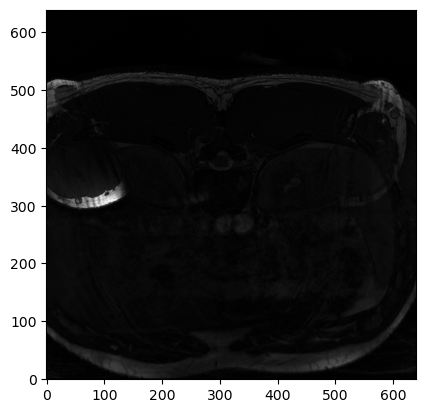

In [8]:
testyx = cv.normalize(cisstra_yx[40,:,:],None,0,255,cv.NORM_MINMAX).astype(np.uint8)
# Visualization
plt.imshow(testyx,cmap='Greys_r',origin='lower')

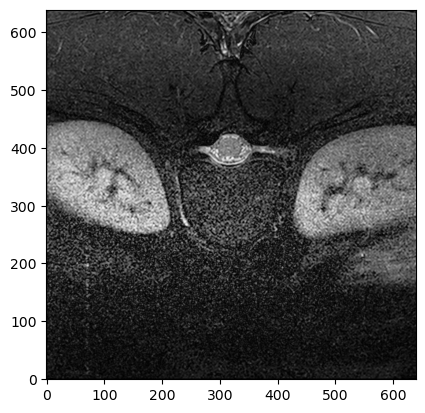

In [87]:
testtseyx = cv.normalize(t2tse_yx[4,:,:],None,0,255,cv.NORM_MINMAX).astype(np.uint8)
# Visualization
plt.imshow(testtseyx,cmap='Greys_r',origin='lower')

In [10]:
tseroi = testtseyx[370:430,270:370]
plt.imshow(tseroi,cmap='Greys_r',origin='lower')

NameError: name 'testtseyx' is not defined

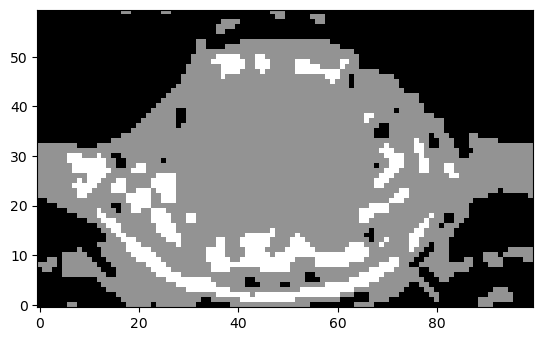

In [106]:
#获取图像高度和宽度
height = tseroi.shape[0]
width = tseroi.shape[1]
#创建一幅图像
result = np.zeros((height, width), np.uint8)
#图像灰度上移变换 DB=DA+50
for i in range(height):
    for j in range(width):
        if (int(tseroi[i,j])<=60):
            gray = 0
        elif (60<int(tseroi[i,j])<150):
            gray = 125
        else:
            gray = 255
        result[i,j] = np.uint8(gray)
plt.imshow(result,cmap='Greys_r',origin='lower')

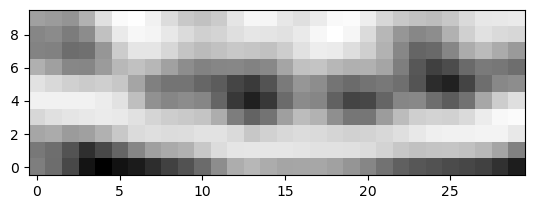

In [96]:
coreroi = testtseyx[370:380,300:330]
plt.imshow(coreroi,cmap='Greys_r',origin='lower')


In [102]:
coreroi[4,19]

55

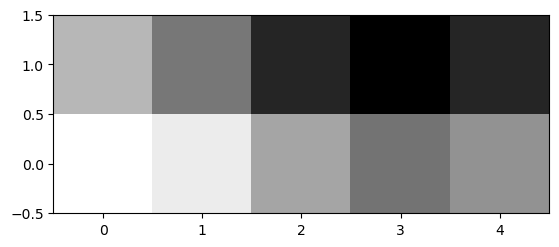

In [100]:
plt.imshow(coreroi[3:5,10:15],cmap='Greys_r',origin='lower')

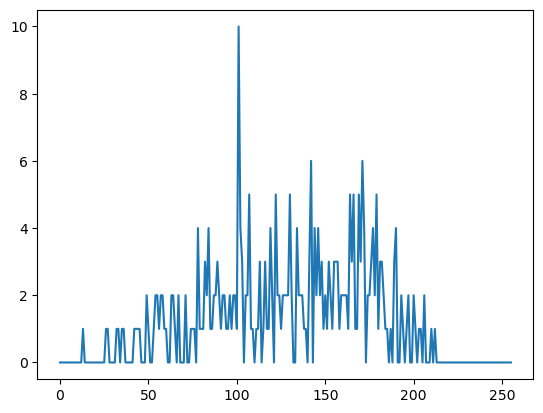

In [97]:
hist = cv.calcHist([coreroi], [0], None, [256], [0, 256]) 
plt.plot(hist)

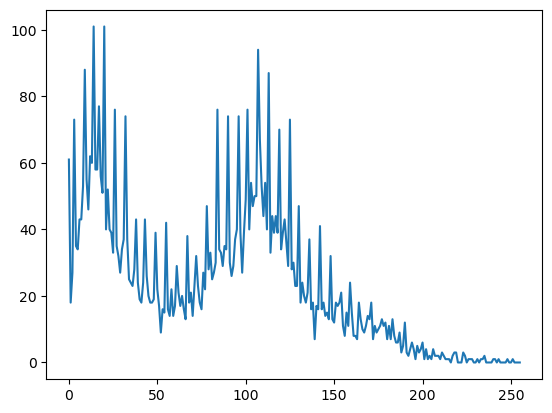

In [90]:
hist = cv.calcHist([tseroi], [0], None, [256], [0, 256]) 
plt.plot(hist)

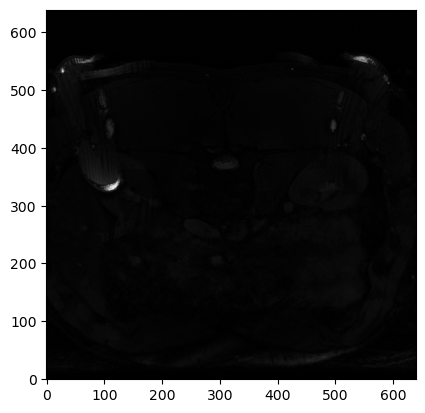

In [8]:
plt.imshow(cisstra_yx[4,:,:],cmap='Greys_r',origin='lower')

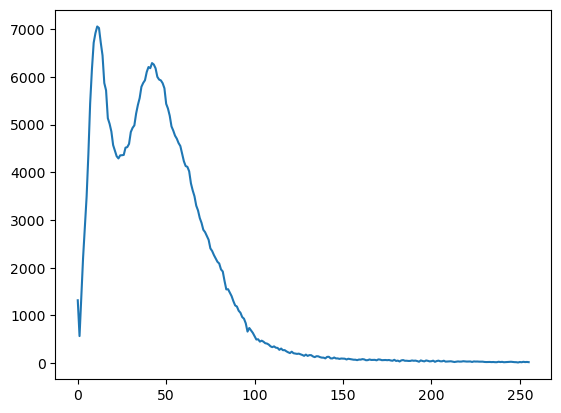

In [9]:
hist = cv.calcHist([cisstra_yx[4,:,:]], [0], None, [256], [0, 256]) 
plt.plot(hist)

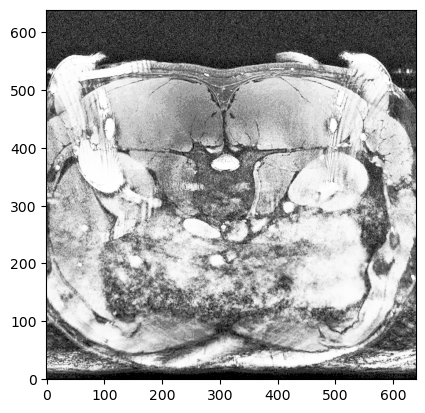

In [11]:
testeq = cv.equalizeHist(testyx, dst=None)
plt.imshow(testeq,cmap='Greys_r',origin='lower')

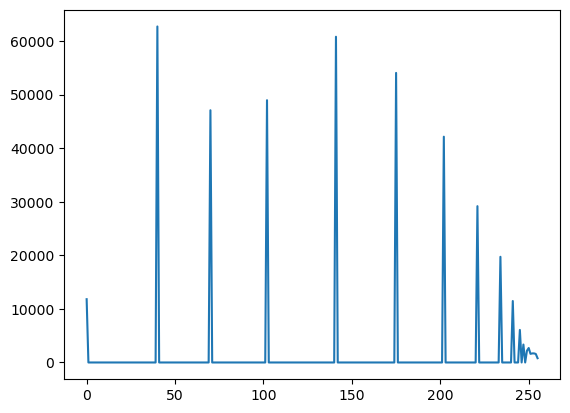

In [12]:
hist = cv.calcHist([testeq], [0], None, [256], [0, 256]) 
plt.plot(hist)

## 灰度变换

### 灰度上移变换

In [37]:
#示例代码
#获取图像高度和宽度
height = testyx.shape[0]
width = testyx.shape[1]
#创建一幅图像
result = np.zeros((height, width), np.uint8)
#图像灰度上移变换 DB=DA+50
for i in range(height):
    for j in range(width):
        if (int(testyx[i,j]+50) > 255):
            gray = 255
        else:
            gray = int(testyx[i,j]+50)
        result[i,j] = np.uint8(gray)



In [26]:
# 优化后的代码
testyx50 = []
for i in testyx.flatten():
    testyx50.append(i+50 if i+50<=255 else 255)
testyx50p = np.array(testyx50).reshape(testyx.shape)

In [38]:
result

array([[50, 50, 50, ..., 50, 50, 50],
       [50, 51, 51, ..., 50, 50, 50],
       [50, 51, 51, ..., 50, 50, 50],
       ...,
       [50, 51, 51, ..., 51, 51, 52],
       [50, 52, 51, ..., 51, 51, 52],
       [50, 51, 51, ..., 52, 51, 52]], dtype=uint8)

In [27]:
testyx50p

array([[100, 100, 100, ..., 100, 100, 100],
       [100, 101, 101, ..., 100, 100, 100],
       [100, 101, 101, ..., 100, 100, 100],
       ...,
       [100, 101, 101, ..., 101, 101, 102],
       [100, 102, 101, ..., 101, 101, 102],
       [100, 101, 101, ..., 102, 101, 102]])

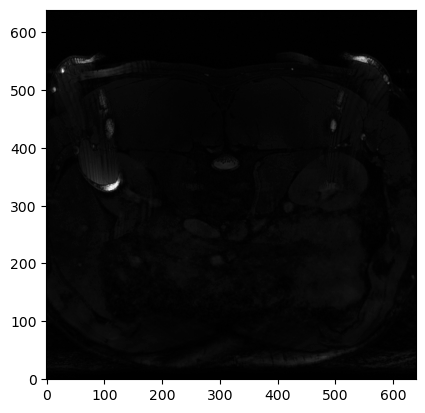

In [29]:
plt.imshow(testyx50p,cmap='Greys_r',origin='lower')

In [44]:
max(testyx.flatten())

255

In [46]:
min(testyx.flatten())

0

### 对比度增强/减弱



In [ ]:

#读取原始图像
img = cv2.imread('miao.png')
#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]
#创建一幅图像
result = np.zeros((height, width), np.uint8)
#图像对比度增强变换 DB=DA*1.5
for i in range(height):
 for j in range(width):
 if (int(grayImage[i,j]*1.5) > 255):
            gray = 255
 else:
            gray = int(grayImage[i,j]*1.5)
        result[i,j] = np.uint8(gray)
#显示图像
cv2.imshow("Gray Image", grayImage)
cv2.imshow("Result", result)

In [49]:
min(testyxaug.flatten())

0.0

In [57]:
max(testyx.flatten())

255

In [59]:
[testyx]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 1, 1, 2],
        [0, 2, 1, ..., 1, 1, 2],
        [0, 1, 1, ..., 2, 1, 2]], dtype=uint8)]

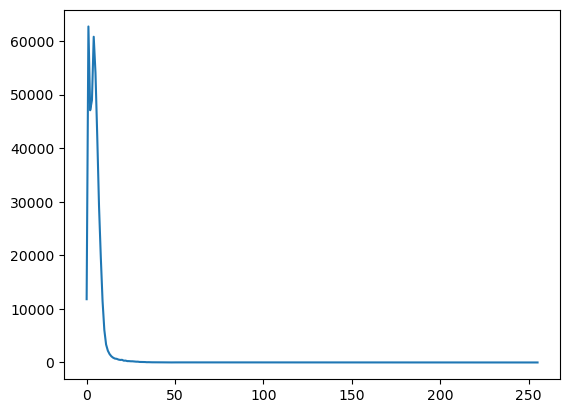

In [58]:
hist = cv.calcHist([testyx], [0], None, [256], [0, 256]) 
plt.plot(hist)

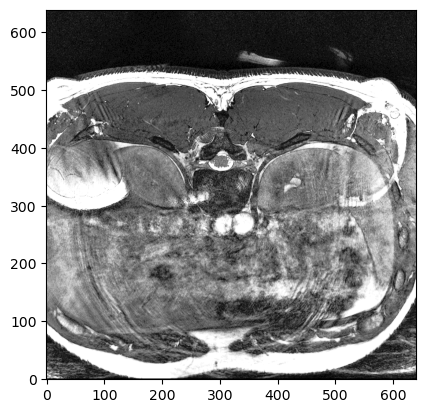

In [11]:
# 优化后的代码
testyxaug= []
for i in testyx.flatten():
    testyxaug.append(i*15 if i*15<=255 else 255)
testyxaug = np.array(testyxaug).reshape(testyx.shape)

plt.imshow(testyxaug,cmap='Greys_r',origin='lower')

In [12]:
testyxroi = testyxaug[355:395,280:340]

In [14]:
testyxroi = testyx[355:395,280:340]

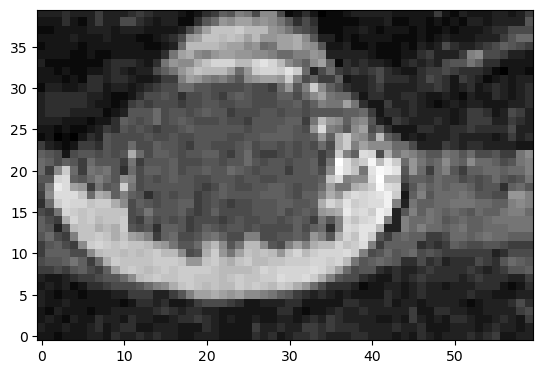

In [15]:
plt.imshow(testyxroi,cmap='Greys_r',origin='lower')

### 超分

In [16]:
img3 = np.expand_dims(testyxroi,axis=-1)
img3 = np.concatenate((img3, img3, img3), axis=-1)
# img2[:,:,0] = cropped
# img2[:,:,1] = cropped
# img2[:,:,2] = cropped
print(img3.shape)

(40, 60, 3)


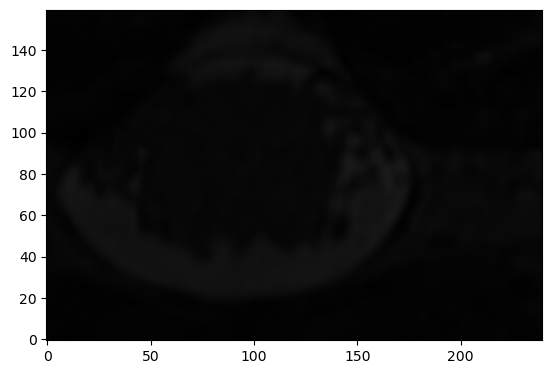

In [17]:
from cv2 import dnn_superres

# 创建模型
sr = dnn_superres.DnnSuperResImpl_create()   
# 读取模型
path = r"C:\Users\EugeneZHOU\Downloads\EDSR_Tensorflow-master\EDSR_Tensorflow-master\models\EDSR_x4.pb"
sr.readModel(path)
#  设定算法和放大比例
algorithm = "edsr"
sr.setModel(algorithm, 4)
# 放大图像
img_edsr4 = sr.upsample(img3)
plt.imshow(img_edsr4,cmap='Greys_r', origin = 'lower')

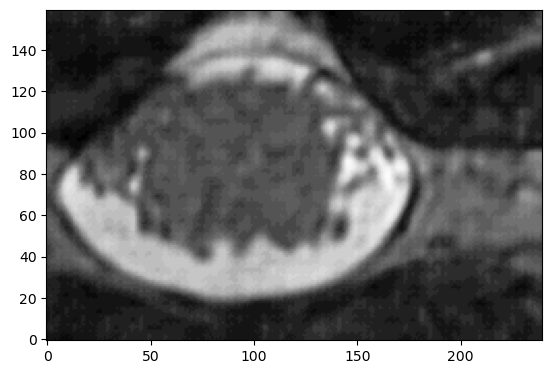

In [22]:
plt.imshow(img_edsr4[:,:,1],cmap='Greys_r', origin = 'lower')

In [21]:
img_edsr4.shape

(160, 240, 3)